In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Series

In [5]:
s1 = pd.Series([1,2,3])
s2 = pd.Series(['a','b','c'])
s1, s2

(0    1
 1    2
 2    3
 dtype: int64,
 0    a
 1    b
 2    c
 dtype: object)

In [7]:
s3 = pd.Series(np.arange(100))
s3

0      0
1      1
2      2
3      3
4      4
      ..
95    95
96    96
97    97
98    98
99    99
Length: 100, dtype: int64

In [12]:
s4 = pd.Series([1,2,3],['a','b','c'], dtype=np.int16)
s4

a    1
b    2
c    3
dtype: int16

In [13]:
s4.values, s4.index

(array([1, 2, 3], dtype=int16), Index(['a', 'b', 'c'], dtype='object'))

---


In [16]:
s = pd.Series([1,2,3,2,1,2,2,3,3,4, np.NaN])
s, len(s), s.size, s.shape, s.unique(), s.count()

(0     1.0
 1     2.0
 2     3.0
 3     2.0
 4     1.0
 5     2.0
 6     2.0
 7     3.0
 8     3.0
 9     4.0
 10    NaN
 dtype: float64,
 11,
 11,
 (11,),
 array([ 1.,  2.,  3.,  4., nan]),
 10)

In [19]:
a = np.array(s)
a.mean(), s.mean()

(nan, 2.3)

In [21]:
s.value_counts()

2.0    4
3.0    3
1.0    2
4.0    1
dtype: int64

In [22]:
s.head(), s.tail()

(0    1.0
 1    2.0
 2    3.0
 3    2.0
 4    1.0
 dtype: float64,
 6     2.0
 7     3.0
 8     3.0
 9     4.0
 10    NaN
 dtype: float64)

---
### Series 연산

In [25]:
s1 = pd.Series([1,2,3,4], ['a','b','c','d'])
s2 = pd.Series([1,2,3,4], ['d','c','b','a'])

In [26]:
s1 + s2

a    5
b    5
c    5
d    5
dtype: int64

In [27]:
s1 ** 2

a     1
b     4
c     9
d    16
dtype: int64

In [28]:
s1 ** s2

a    1
b    8
c    9
d    4
dtype: int64

In [29]:
s1['k'] = 7
s2['e'] = 7

s1 + s2

a    5.0
b    5.0
c    5.0
d    5.0
e    NaN
k    NaN
dtype: float64

---
### Boolean selection

In [32]:
s = pd.Series(np.arange(10),np.arange(10)+1)
s > 5, s.index > 5, s[s>5], s[s.index>5]

(1     False
 2     False
 3     False
 4     False
 5     False
 6     False
 7      True
 8      True
 9      True
 10     True
 dtype: bool,
 array([False, False, False, False, False,  True,  True,  True,  True,
         True]),
 7     6
 8     7
 9     8
 10    9
 dtype: int64,
 6     5
 7     6
 8     7
 9     8
 10    9
 dtype: int64)

In [33]:
s[(s>5) & (s<8)]

7    6
8    7
dtype: int64

In [34]:
(s >= 7).sum(), (s[s>=7]).sum()

(3, 24)

---
### 값 변경

In [47]:
s = pd.Series(np.arange(100,105), ['a','b','c','d','e'])
print(s)
s['a'] = 200
print(s)

a    100
b    101
c    102
d    103
e    104
dtype: int64
a    200
b    101
c    102
d    103
e    104
dtype: int64


In [48]:
s.drop('a'), s

(b    101
 c    102
 d    103
 e    104
 dtype: int64,
 a    200
 b    101
 c    102
 d    103
 e    104
 dtype: int64)

In [49]:
s.drop('a', inplace=True), s

(None,
 b    101
 c    102
 d    103
 e    104
 dtype: int64)

---
### Slicing

In [52]:
s[1:3], s['c':'e'] # 문자열 인덱스는 마지막 요소도 포함

(c    102
 d    103
 dtype: int64,
 c    102
 d    103
 e    104
 dtype: int64)

---
# DataFrame

In [53]:
train_data = pd.read_csv('./train.csv')

In [60]:
display(train_data.tail(n=3))
display(train_data.describe())
display(train_data.info())
train_data.shape

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

(891, 12)

In [61]:
train_data.index, train_data.columns

(RangeIndex(start=0, stop=891, step=1),
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'))

---
### DataFrame 생성

In [62]:
data = {'a': 100, 'b': 200 , 'c': 300}
pd.DataFrame(data, index=['x','y','z'])

,a,b,c
x,100,200,300
y,100,200,300
z,100,200,300


In [65]:
# from dict
data = {'a': [100,101,102], 'b': [200,201,202] , 'c': [300,301,302]}
pd.DataFrame(data, index=['x','y','z'])


,a,b,c
x,100,200,300
y,101,201,301
z,102,202,302


In [67]:
a = pd.Series(np.arange(3), ['a','b','c'])
b = pd.Series(np.arange(3,6), ['a','b','c'])
c = pd.Series(np.arange(6,9), ['a','b','c'])

pd.DataFrame([a,b,c])

,a,b,c
0,0,1,2
1,3,4,5
2,6,7,8


In [68]:
a = pd.Series(np.arange(3), ['a','b','c'])
b = pd.Series(np.arange(3,6), ['a','b','k'])
c = pd.Series(np.arange(6,9), ['a','b','e'])

pd.DataFrame([a,b,c])

,a,b,c,k,e
0,0.0,1.0,2.0,NaN,NaN
1,3.0,4.0,NaN,5.0,NaN
2,6.0,7.0,NaN,NaN,8.0


---

In [73]:
pd.read_csv('./train.csv'
            , sep=','
#             , header=None
            , index_col='PassengerId'
            , usecols=['PassengerId', 'Survived', 'Pclass'])


,Survived,Pclass
PassengerId,,
1,0,3
2,1,1
3,1,3
4,1,1
5,0,3
...,...,...
887,0,2
888,1,1
889,0,3


In [74]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [75]:
type(train_data['PassengerId']),type(train_data[['PassengerId']])


(pandas.core.series.Series, pandas.core.frame.DataFrame)

In [82]:
train_data.index = np.arange(100,991)
print(type(train_data.iloc[0]))
display(train_data.loc[np.arange(100, 103)])
display(train_data.iloc[np.arange(100, 103)])

<class 'pandas.core.series.Series'>


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
100,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
101,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
102,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
200,101,0,3,"Petranec, Miss. Matilda",female,28.0,0,0,349245,7.8958,NaN,S
201,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S
202,103,0,1,"White, Mr. Richard Frasar",male,21.0,0,1,35281,77.2875,D26,S


In [88]:
display(train_data.loc[[100, 101,102],['PassengerId','Survived']])
display(train_data.iloc[[100, 101,102],[0,1,2]])



,PassengerId,Survived
100,1,0
101,2,1
102,3,1


,PassengerId,Survived,Pclass
200,101,0,3
201,102,0,3
202,103,0,1


---
### Boolean indexing

In [89]:
class_ = train_data['Pclass'] == 1
age_ = (train_data['Age'] >= 30) & (train_data['Age'] < 40)

train_data[class_ & age_]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
101,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
103,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
161,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN
237,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,C123,S
315,216,1,1,"Newell, Miss. Madeleine",female,31.0,1,0,35273,113.2750,D36,C
318,219,1,1,"Bazzani, Miss. Albina",female,32.0,0,0,11813,76.2917,D15,C
324,225,1,1,"Hoyt, Mr. Frederick Maxfield",male,38.0,1,0,19943,90.0000,C93,S
330,231,1,1,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",female,35.0,1,0,36973,83.4750,C83,S
348,249,1,1,"Beckwith, Mr. Richard Leonard",male,37.0,1,1,11751,52.5542,D35,S
357,258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.5000,B77,S


---
### Columns

In [90]:
train_data.insert(3, 'Fare100', train_data['Fare'] / 10)

In [91]:
train_data.head()

,PassengerId,Survived,Pclass,Fare100,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
100,1,0,3,0.72500,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
101,2,1,1,7.12833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
102,3,1,3,0.79250,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
103,4,1,1,5.31000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
104,5,0,3,0.80500,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [93]:
train_data.drop('Fare100', axis=1, inplace=True)
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
100,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
101,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
102,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
103,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
104,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
986,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
987,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
988,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
989,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


---
### corr

In [25]:
train_data = pd.read_csv('./train.csv')

In [4]:
train_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


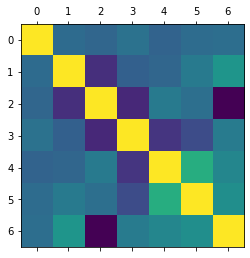

In [5]:
plt.matshow(train_data.corr())

---
### NaN

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_data.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
train_data.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


In [12]:
train_data.dropna(subset=['Age']).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Cabin        185 non-null    object 
 11  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB


In [13]:
train_data.dropna(axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
dtypes: float64(1), int64(5), object(3)
memory usage: 62.8+ KB


In [14]:
train_data['Age'].fillna(train_data['Age'].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [26]:
mean1 = train_data[train_data['Survived']==1]['Age'].mean()
mean2 = train_data[train_data['Survived']==0]['Age'].mean()

In [29]:
train_data.loc[train_data['Survived']==1, 'Age'] = train_data[train_data['Survived']==1]['Age'].fillna(mean1)
train_data.loc[train_data['Survived']==0, 'Age'] = train_data[train_data['Survived']==0]['Age'].fillna(mean2)


In [30]:
train_data['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    30.626179
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

---

In [31]:
# 타입변경
train_data['Pclass'] = train_data['Pclass'].astype(str)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [32]:
# 숫자형을 범주형으로
import math

def age_categorize(age):
    return math.floor(age / 10) * 10

In [33]:
train_data['Age'].apply(age_categorize)

0      20
1      30
2      20
3      30
4      30
       ..
886    20
887    10
888    30
889    20
890    30
Name: Age, Length: 891, dtype: int64

In [37]:
pd.get_dummies(train_data, columns=['Pclass','Sex'], drop_first=True)


,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_2,Pclass_3,Sex_male
0,1,0,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,NaN,S,0,1,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,C85,C,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,C123,S,0,0,0
4,5,0,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,NaN,S,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,NaN,S,1,0,1
887,888,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,B42,S,0,0,0
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",30.626179,1,2,W./C. 6607,23.4500,NaN,S,0,1,0
889,890,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,C148,C,0,0,1


---
### Group by

In [38]:
class_group = train_data.groupby('Pclass')
class_group

In [39]:
class_group.groups

{'1': [1, 3, 6, 11, 23, 27, 30, 31, 34, 35, 52, 54, 55, 61, 62, 64, 83, 88, 92, 96, 97, 102, 110, 118, 124, 136, 137, 139, 151, 155, 166, 168, 170, 174, 177, 185, 187, 194, 195, 209, 215, 218, 224, 230, 245, 248, 252, 256, 257, 258, 262, 263, 268, 269, 270, 273, 275, 284, 290, 291, 295, 297, 298, 299, 305, 306, 307, 309, 310, 311, 318, 319, 325, 329, 331, 332, 334, 336, 337, 339, 341, 351, 356, 366, 369, 370, 373, 375, 377, 380, 383, 390, 393, 412, 430, 434, 435, 438, 445, 447, ...], '2': [9, 15, 17, 20, 21, 33, 41, 43, 53, 56, 58, 66, 70, 72, 78, 84, 98, 99, 117, 120, 122, 123, 133, 134, 135, 144, 145, 148, 149, 150, 161, 178, 181, 183, 190, 191, 193, 199, 211, 213, 217, 219, 221, 226, 228, 232, 234, 236, 237, 238, 239, 242, 247, 249, 259, 265, 272, 277, 288, 292, 303, 308, 312, 314, 316, 317, 322, 323, 327, 340, 342, 343, 344, 345, 346, 357, 361, 385, 387, 389, 397, 398, 399, 405, 407, 413, 416, 417, 418, 426, 427, 432, 437, 439, 440, 443, 446, 450, 458, 463, ...], '3': [0, 2, 4, 5, 

In [40]:
class_group.count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,216,216,216,216,216,216,216,216,216,176,214
2,184,184,184,184,184,184,184,184,184,16,184
3,491,491,491,491,491,491,491,491,491,12,491


In [41]:
class_group.sum()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,99705,136,7998.250523,90,77,18177.4125
2,82056,87,5496.588013,74,70,3801.8417
3,215625,119,13012.475731,302,193,6714.6951


In [42]:
class_group.mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,37.028938,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.872761,0.402174,0.380435,20.662183
3,439.154786,0.242363,26.501987,0.615071,0.393075,13.675550


In [43]:
train_data.groupby(['Pclass','Sex']).mean()

PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex                                                            
1      female   469.212766  0.968085  34.011630  0.553191  0.457447   
       male     455.729508  0.368852  39.353748  0.311475  0.278689   
2      female   443.105263  0.921053  28.712992  0.486842  0.605263   
       male     447.962963  0.157407  30.688895  0.342593  0.222222   
3      female   399.729167  0.500000  23.942620  0.895833  0.798611   
       male     455.515850  0.135447  27.564088  0.498559  0.224784   

                     Fare  
Pclass Sex                 
1      female  106.125798  
       male     67.226127  
2      female   21.970121  
       male     19.741782  
3      female   16.118810  
       male     12.661633

In [44]:
train_data.set_index(['Pclass','Sex'])

,,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,Sex,,,,,,,,,,
3,male,1,0,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,NaN,S
1,female,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,C85,C
3,female,3,1,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
1,female,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,C123,S
3,male,5,0,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
2,male,887,0,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,NaN,S
1,female,888,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,B42,S
3,female,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",30.626179,1,2,W./C. 6607,23.4500,NaN,S


In [45]:
df = train_data
df.set_index('Age').groupby(level=0).mean()

,PassengerId,Survived,SibSp,Parch,Fare
Age,,,,,
0.42,804.0,1.0,0.0,1.0,8.5167
0.67,756.0,1.0,1.0,1.0,14.5000
0.75,557.5,1.0,2.0,1.0,19.2583
0.83,455.5,1.0,0.5,1.5,23.8750
0.92,306.0,1.0,1.0,2.0,151.5500
...,...,...,...,...,...
70.00,709.5,0.0,0.5,0.5,40.7500
70.50,117.0,0.0,0.0,0.0,7.7500
71.00,295.5,0.0,0.0,0.0,42.0792


In [46]:
df.set_index('Age').groupby(age_categorize).mean()

,PassengerId,Survived,SibSp,Parch,Fare
Age,,,,,
0,424.741935,0.612903,1.854839,1.403226,30.576679
10,444.362745,0.401961,0.666667,0.470588,32.535132
20,421.073529,0.474265,0.330882,0.224265,27.639949
30,468.410959,0.250000,0.479452,0.277397,31.330050
40,465.606742,0.382022,0.370787,0.471910,38.002297
50,440.187500,0.416667,0.291667,0.270833,47.933333
60,433.736842,0.315789,0.263158,0.368421,48.367542
70,496.500000,0.000000,0.166667,0.166667,30.197233
80,631.000000,1.000000,0.000000,0.000000,30.000000


In [48]:
df.set_index(['Pclass','Sex']).groupby(level=[0,1]).mean()

PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex                                                            
1      female   469.212766  0.968085  34.011630  0.553191  0.457447   
       male     455.729508  0.368852  39.353748  0.311475  0.278689   
2      female   443.105263  0.921053  28.712992  0.486842  0.605263   
       male     447.962963  0.157407  30.688895  0.342593  0.222222   
3      female   399.729167  0.500000  23.942620  0.895833  0.798611   
       male     455.515850  0.135447  27.564088  0.498559  0.224784   

                     Fare  
Pclass Sex                 
1      female  106.125798  
       male     67.226127  
2      female   21.970121  
       male     19.741782  
3      female   16.118810  
       male     12.661633

In [49]:
df.set_index(['Pclass','Sex']).groupby(level=[0,1]).aggregate([np.mean, np.sum])



PassengerId          Survived            Age               \
                     mean     sum      mean sum       mean          sum   
Pclass Sex                                                                
1      female  469.212766   44106  0.968085  91  34.011630  3197.093207   
       male    455.729508   55599  0.368852  45  39.353748  4801.157316   
2      female  443.105263   33676  0.921053  70  28.712992  2182.187379   
       male    447.962963   48380  0.157407  17  30.688895  3314.400634   
3      female  399.729167   57561  0.500000  72  23.942620  3447.737289   
       male    455.515850  158064  0.135447  47  27.564088  9564.738443   

                  SibSp          Parch             Fare             
                   mean  sum      mean  sum        mean        sum  
Pclass Sex                                                          
1      female  0.553191   52  0.457447   43  106.125798  9975.8250  
       male    0.311475   38  0.278689   34   67.226127  8201.5875  
2      female  0.486842   37  0.605263   46   21.970121  1669.7292  
       male    0.342593   37  0.222222   24   19.741782  2132.1125  
3      female  0.895833  129  0.798611  115   16.118810  2321.1086  
       male    0.498559  173  0.224784   78   12.661633  4393.5865

---
## Transform

In [2]:
df = pd.read_csv('./train.csv')

In [3]:
df.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [4]:
df.groupby('Pclass').transform(np.mean)

/var/folders/wm/81_1tvfj2d33qx0fm3gd2s4w0000gn/T/ipykernel_16675/3941387923.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.
  df.groupby('Pclass').transform(np.mean)


,PassengerId,Survived,Age,SibSp,Parch,Fare
0,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550
3,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
4,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550
...,...,...,...,...,...,...
886,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
887,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
888,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550
889,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687


In [5]:
df.groupby(['Pclass','Sex']).transform(np.mean)

/var/folders/wm/81_1tvfj2d33qx0fm3gd2s4w0000gn/T/ipykernel_16675/638798169.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.
  df.groupby(['Pclass','Sex']).transform(np.mean)


,PassengerId,Survived,Age,SibSp,Parch,Fare
0,455.515850,0.135447,26.507589,0.498559,0.224784,12.661633
1,469.212766,0.968085,34.611765,0.553191,0.457447,106.125798
2,399.729167,0.500000,21.750000,0.895833,0.798611,16.118810
3,469.212766,0.968085,34.611765,0.553191,0.457447,106.125798
4,455.515850,0.135447,26.507589,0.498559,0.224784,12.661633
...,...,...,...,...,...,...
886,447.962963,0.157407,30.740707,0.342593,0.222222,19.741782
887,469.212766,0.968085,34.611765,0.553191,0.457447,106.125798
888,399.729167,0.500000,21.750000,0.895833,0.798611,16.118810
889,455.729508,0.368852,41.281386,0.311475,0.278689,67.226127


---
### pivot

In [6]:
df = pd.DataFrame({
    '지역':['서울','서울','서울','경기','경기','부산'],
    '요일':['월요일','화요일','수요일','월요일','화요일','월요일'],
    '강수량':[100,80,1000,200,200,100],
    '강수확률':[80,70,90,10,20,30]
})

df

,지역,요일,강수량,강수확률
0,서울,월요일,100,80
1,서울,화요일,80,70
2,서울,수요일,1000,90
3,경기,월요일,200,10
4,경기,화요일,200,20
5,부산,월요일,100,30


In [7]:
df.pivot('지역','요일')

강수량                강수확률            
요일     수요일    월요일    화요일   수요일   월요일   화요일
지역                                        
경기     NaN  200.0  200.0   NaN  10.0  20.0
부산     NaN  100.0    NaN   NaN  30.0   NaN
서울  1000.0  100.0   80.0  90.0  80.0  70.0

In [9]:
df.pivot('요일','지역', '강수량')

지역,경기,부산,서울
요일,,,
수요일,NaN,NaN,1000.0
월요일,200.0,100.0,100.0
화요일,200.0,NaN,80.0


In [11]:
pd.pivot_table(df, index='요일',columns='지역',aggfunc=np.mean)

강수량                 강수확률            
지역      경기     부산      서울    경기    부산    서울
요일                                         
수요일    NaN    NaN  1000.0   NaN   NaN  90.0
월요일  200.0  100.0   100.0  10.0  30.0  80.0
화요일  200.0    NaN    80.0  20.0   NaN  70.0

---
### Stack & Unstack

In [13]:
new_df = df.set_index(['지역','요일'])
new_df

강수량  강수확률
지역 요일             
서울 월요일   100    80
   화요일    80    70
   수요일  1000    90
경기 월요일   200    10
   화요일   200    20
부산 월요일   100    30

In [14]:
new_df.unstack(0)

강수량                 강수확률            
지역      경기     부산      서울    경기    부산    서울
요일                                         
수요일    NaN    NaN  1000.0   NaN   NaN  90.0
월요일  200.0  100.0   100.0  10.0  30.0  80.0
화요일  200.0    NaN    80.0  20.0   NaN  70.0

In [15]:
new_df.unstack(1)

강수량                강수확률            
요일     수요일    월요일    화요일   수요일   월요일   화요일
지역                                        
경기     NaN  200.0  200.0   NaN  10.0  20.0
부산     NaN  100.0    NaN   NaN  30.0   NaN
서울  1000.0  100.0   80.0  90.0  80.0  70.0

In [17]:
new_df.unstack(0).stack(0) 

지역           경기     부산      서울
요일                            
수요일 강수량     NaN    NaN  1000.0
    강수확률    NaN    NaN    90.0
월요일 강수량   200.0  100.0   100.0
    강수확률   10.0   30.0    80.0
화요일 강수량   200.0    NaN    80.0
    강수확률   20.0    NaN    70.0

In [18]:
new_df.unstack(0).stack(1)

강수량  강수확률
요일  지역              
수요일 서울  1000.0  90.0
월요일 경기   200.0  10.0
    부산   100.0  30.0
    서울   100.0  80.0
화요일 경기   200.0  20.0
    서울    80.0  70.0